## Various type of TS

### 1) Univariate Time Series

A univariate time series, is a series with a single time-dependent variable like Demand for a product at time, t.

For example, have a look at the sample dataset below that consists of the minimum temperatures across the months of the year from the Southern Hemisphere from 1981 to 1990. Here, temperature is the dependent variable (dependent on Time).

In [1]:
### Load required libraries

from    pandas             import   read_csv, Grouper, DataFrame, concat
import  matplotlib.pyplot  as       plt


In [2]:
### Read the time series data

# series   =  read_csv('data/daily-minimum-temperatures.csv', header = 0, index_col = 0, parse_dates = True, squeeze = True)

FileNotFoundError: [Errno 2] No such file or directory: 'data/daily-minimum-temperatures.csv'

In [ ]:
### Print first five records

# print(series.head())

#### Plot the time series data to detect patterns

In [ ]:
# series.plot()
# plt.ylabel('Minimum Temp')
# plt.title('Minimum temperature in Southern Hemisphere \n From 1981 to 1990')
# plt.show()

Suppose we predict the temperature for the next few months, we will look at the past values and try to gauge and extract a pattern. 

Here we observe a pattern within each year indicating a seasonal effect. Such observations will help us in predicting future values. 

**Note: We have used only one variable, Temp (the temperature of the past 19 years).**

Hence, this is called Univariate Time Series Analysis/Forecasting.

 ### Multi-variate Time Series

A Multivariate time series has more than one time-dependent variable. Each variable depends not only on its past values but also has some dependency on other variables. This dependency is used for forecasting future values.
https://www.analyticsvidhya.com/blog/2018/09/multivariate-time-series-guide-forecasting-modeling-python-codes/

Air pollution forecasting

https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/

This dataset reports on the weather and the level of pollution each hour for five years at the US embassy in Beijing, China.
The data includes the date-time, the pollution called PM2.5 concentration, and the weather information including dew point, temperature, pressure, wind direction, wind speed and the cumulative number of hours of snow and rain. 

The complete feature list in the raw data is as follows:

| Sl No | Variable | Description |
| --- | --------------- | ------------------------------ |
| 1 | No | row number | 
| 2 | qyear | year of data in this row | 
| 3 | month | month of data in this row | 
| 4 | day | day of data in this row | 
| 5 | hour | hour of data in this row | 
| 6 | pm2.5 | PM2.5 concentration | 
| 7 | DEWP | Dew Point | 
| 8 | TEMP | Temperature | 
| 9 | PRES | Pressure | 
| 10 | cbwd | Combined wind direction | 
| 11 | Iws | Cumulated wind speed | 
| 12 | Is | Cumulated hours of snow | 
| 13 | Ir | Cumulated hours of rain | 


**Given the weather conditions and pollution for prior hours, we forecast the pollution at the next hour.**

* 1) Consolidate the date-time information into a single date-time so that we can use it as an index in Pandas.
* 2) Treat NA values. 

A quick check reveals NA values for pm2.5 for the first 24 hours. We will, therefore, need to remove the first row of data. There are also a few scattered “NA” values later in the dataset; we can mark them with 0 values for now.

* 1) Load the raw dataset and parses the date-time information as the Pandas DataFrame index. 
* 2) Drop the “No” column 
* 3) Name each column. 
* 4) Replace NA values with “0” 
* 5) Remove first 24 hours.

In [ ]:
from pandas import read_csv
from datetime import datetime

# load libraries

def parse(x):
    return datetime.strptime(x, '%Y %m %d %H')

# Load dataset

dataset = read_csv('data/raw.csv',  parse_dates = [['year', 'month', 'day', 'hour']],
                   index_col=0, date_parser=parse)
dataset.drop('No', axis=1, inplace=True)

# manually specify column names

dataset.columns = ['pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']
dataset.index.name = 'date'

# mark all NA values with 0
dataset['pollution'].fillna(0, inplace=True)

# drop the first 24 hours
dataset = dataset[24:]

# summarize first 5 rows
print(dataset.head(5))

 Plot each series as a separate subplot, except wind speed dir, which is categorical.

In [ ]:
values = dataset.values

# specify columns to plot

groups = [0, 1, 2, 3, 5, 6, 7]
i = 1

# plot each column
plt.figure()

for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(dataset.columns[group], y=0.5, loc='right')
    i += 1
    
plt.show()

We have created a plot with 7 subplots showing the 5 years of data for each variable.

## Reading and saving TS objects in Python

### Example 1 

#### Use US Airpassengers data set

In [ ]:
from     pandas            import  read_csv, DataFrame, concat, Grouper
import   pandas            as      pd
import   matplotlib.pyplot as      plt

dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')

data      =   pd.read_csv('data/AirPassenger.csv', parse_dates = ['Year-Month'], index_col = 'Year-Month', date_parser = dateparse)
plt.plot(data) 
plt.show()

Some of the arguments for read_csv are explained here.

* parse_dates:     This specifies the column which contains the date-time information. 
* index_col:       A key idea behind using Pandas for TS data is that the index has to be the variable depicting date-time information. 
* date_parser:    This specifies a function which converts an input string into datetime variable. Be default Pandas reads data in format ‘YYYY-MM-DD HH:MM:SS’. If the data is not in this format, the format has to be manually defined. 


In [ ]:
### Save the TS object 
series.to_csv('data/ts1.csv', index = True, sep = ',')

### Check the object retrieved
series1 = series.from_csv('data/ts1.csv', header = 0)

### Check
print(type(series1))
print(series1.head(2).T)

### Example 2

Read GDP India series and save this TS object using python.
Data is yearly from 1960-1-1 to 2017-12-31.

https://pythontips.com/2013/08/02/what-is-pickle-in-python/

Any object in python can be pickled so that it can be saved on disk. What pickle does is that it “serialises” the object first before writing it to file. 

Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.

Now we store the TS object and retrieve the same from the pickle object.

In [6]:
from     pandas            import  read_csv, DataFrame, concat, Grouper
import   pandas            as      pd
import   matplotlib.pyplot as      plt

In [7]:
IndiaGDP = pd.read_csv('data/GDPIndia.csv', header=0)

date_rng = pd.date_range(start='1/1/1960', end='31/12/2017', freq='A')

IndiaGDP['TimeIndex'] = pd.DataFrame(date_rng, columns=['Year'])
IndiaGDP.head(5).T

,0,1,2,3,4
Year,1960,1961,1962,1963,1964
GDPpercapita,81.2848,84.4264,88.9149,100.049,114.315
TimeIndex,1960-12-31 00:00:00,1961-12-31 00:00:00,1962-12-31 00:00:00,1963-12-31 00:00:00,1964-12-31 00:00:00


No handles with labels found to put in legend.


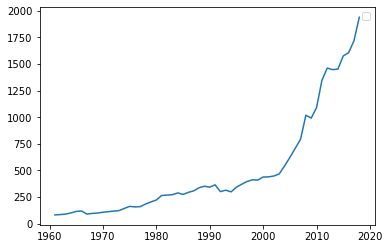

In [8]:
plt.plot(IndiaGDP.TimeIndex, IndiaGDP.GDPpercapita)
plt.legend(loc='best')
plt.show()

In [9]:
### Load as a pickle object

import pickle

with open('GDPIndia.obj', 'wb') as fp:
        pickle.dump(IndiaGDP, fp)

In [10]:
### Retrieve the pickle object

with open('GDPIndia.obj', 'rb') as fp:
     IndiaGDP1 = pickle.load(fp)
        
IndiaGDP1.head(5).T

,0,1,2,3,4
Year,1960,1961,1962,1963,1964
GDPpercapita,81.2848,84.4264,88.9149,100.049,114.315
TimeIndex,1960-12-31 00:00:00,1961-12-31 00:00:00,1962-12-31 00:00:00,1963-12-31 00:00:00,1964-12-31 00:00:00


### Practice Exercise 1

Read English Daily Wage series

* Set the date range starting from '1/1/1950', ending at '31/12/1994' - frequency as 'A'.
* Plot the time series data
* Now we store the TS object as a pickle object and retrieve the same from the pickle object.

In [11]:
EngWage              = pd.read_csv('data/EngWage.csv', header=0)
EngWage.head()

,Year,DailyWage
0,1950,24.27
1,1951,24.17
2,1952,23.76
3,1953,24.17
4,1954,25.18


### Components of TS: Trend & Seasonality

### Example 3

**Shampoo Sales Dataset**

This dataset describes the monthly number of sales of shampoo over a 3 year period.
The units are a sales count and there are 36 observations. The original dataset is credited to Makridakis, Wheelwright, and Hyndman (1998).

Data source: Data Market https://datamarket.com/data/set/22r0/sales-of-shampoo-over-a-three-year-period


Below is a sample of the first 5 rows of data, including the header row.

| Month | Sales |
| ---- | -------- |
| 1-01 | 266.0 | 
| 1-02 | 145.9 | 
| 1-03 | 183.1 | 
| 1-04 | 119.3 | 
| 1-05 | 180.3 | 

In [20]:
import  pandas            as pd
import  matplotlib.pyplot as plt
from datetime import datetime
 
def parser(x):
    return datetime.strptime('190'+x, '%b-%m')
 
series = read_csv('data/shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

series.plot()
plt.show()

ValueError: time data '19001-Feb' does not match format '%b-%m'

### The above plot shows an increasing trend.

### Exercise 4

**Minimum Daily Temperatures Dataset**

https://machinelearningmastery.com/time-series-seasonality-with-python/

This dataset describes the minimum daily temperatures over 10 years (1981-1990) in the city Melbourne, Australia.

Data source: Data Market https://datamarket.com/data/set/22r0/sales-of-shampoo-over-a-three-year-period

The units are in degrees Celsius and there are 3,650 observations. The source of the data is credited as the Australian Bureau of Meteorology.

A sample of the first 5 rows of data, including the header row is shown below:

| Date | Temperature |
| ------- | -------- | 
| 1981-01-01 | 20.7 | 
| 1981-01-02 | 17.9 | 
| 1981-01-03 | 18.8 | 
| 1981-01-04 | 14.6 | 
| 1981-01-05 | 15.8 | 


In [ ]:
### Load required libraries

import    pandas           as pd
import  matplotlib.pyplot  as plt

### Read the time series data

series   =  pd.read_csv('data/daily-minimum-temperatures.csv', header = 0, index_col = 0, parse_dates = True, squeeze = True)

series.plot()
plt.ylabel('Minimum Temp')
plt.title('Minimum temperature in Southern Hemisphere \n From 1981 to 1990')
plt.show()


### The above plot shows a strong seasonality component.

We can draw a boxplot to check the variation across months in a year (1990).
It appears that we have a seasonal component each year showing swing from summer to winter.

In [ ]:
months         = DataFrame()
one_year       = series['1990'] 
groups         = one_year.groupby(Grouper(freq='M')) 
months         = concat([DataFrame(x[1].values) for x in groups], axis=1) 
months         = DataFrame(months) 
months.columns = range(1,13) 
months.boxplot() 
plt.show()

This plot shows the signiﬁcant change in distribution of minimum temperatures across the months of the year from the Southern Hemisphere summer in January to the Southern Hemisphere winter in the middle of the year, and back to summer again.

We group the Minimum Daily Temperatures dataset by years. A box and whisker plot is then created for each year and lined up side-by-side for direct comparison.

In [ ]:
groups = series.groupby(Grouper(freq='A')) 
years  = DataFrame() 
for name, group in groups: 
    years[name.year] = group.values 
years.boxplot() 
plt.show()

We don't observe much year-by-year variation 

### Practice Exercise 2

Use the retail food sales data and plot the time series.

check whether the data shows trend or seasonality or both.

In [21]:
import pandas            as pd
import matplotlib.pyplot as plt

RetailFood = pd.read_csv("data/RetailFood.csv")

In [22]:
RetailFood.head(5)

,Year,Month,Food
0,1992,Jan,164083
1,1992,Feb,164260
2,1992,Mar,163747
3,1992,Apr,164759
4,1992,May,165617


### Example 5

Read Tractor Sales Series


In [23]:
Tractor = pd.read_csv("data/TractorSales.csv")
Tractor.head(5)

,Month-Year,Number of Tractor Sold
0,3-Jan,141
1,3-Feb,157
2,3-Mar,185
3,3-Apr,199
4,3-May,203


In [24]:
dates = pd.date_range(start='2003-01-01', freq='MS', periods=len(Tractor))

In [25]:
import calendar
Tractor['Month'] = dates.month
Tractor['Month'] = Tractor['Month'].apply(lambda x: calendar.month_abbr[x])
Tractor['Year'] = dates.year

In [27]:
#Tractor.drop(['Month-Year'], axis=1, inplace=True)
Tractor.rename(columns={'Number of Tractor Sold':'Tractor-Sales'}, inplace=True)
Tractor = Tractor[['Month', 'Year', 'Tractor-Sales']]

In [28]:
Tractor.set_index(dates, inplace=True)

In [29]:
Tractor = Tractor[['Tractor-Sales']]
Tractor.head(5)

,Tractor-Sales
2003-01-01,141
2003-02-01,157
2003-03-01,185
2003-04-01,199
2003-05-01,203


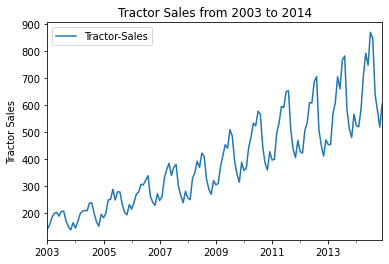

In [30]:
Tractor.plot()
plt.ylabel('Tractor Sales')
plt.title("Tractor Sales from 2003 to 2014")
plt.show()


The above plot shows a strong seasonality and trend component.

We can draw a boxplot to check the variation across months in a year (2011). 

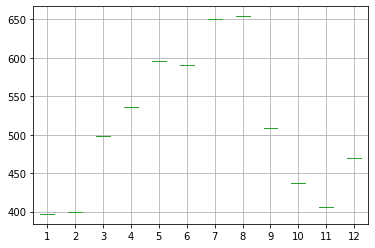

In [31]:
months         = DataFrame()
one_year       = Tractor['2011'] 
groups         = one_year.groupby(Grouper(freq='M')) 
months         = concat([DataFrame(x[1].values) for x in groups], axis=1) 
months         = DataFrame(months) 
months.columns = range(1,13) 
months.boxplot() 
plt.show()

It appears that we have a seasonal component each year showing swing from May to Aug.

In [32]:
Tractor['2003']

,Tractor-Sales
2003-01-01,141
2003-02-01,157
2003-03-01,185
2003-04-01,199
2003-05-01,203
2003-06-01,189
2003-07-01,207
2003-08-01,207
2003-09-01,171
2003-10-01,150


### Practice Exercise 3

Use the Champagne Series data and plot the time series.

check whether the data shows trend or seasonality or both.

In [33]:
import pandas as pd

Champ = pd.read_csv('data/Champagne.csv')
Champ.head()

,Year,Month,Sales
0,1964,Jan,2815
1,1964,Feb,2672
2,1964,Mar,2755
3,1964,Apr,2721
4,1964,May,2946


## Decomposition of Time Series: Additive and Multiplicative model		

### Additive Model

### Additive Decomposition

* An additive model suggests that the components are added together.
* An additive model is linear where changes over time are consistently made by the same amount.
* A linear seasonality has the same frequency (width of the cycles) and amplitude (height of the cycles).

The statsmodels library provides an implementation of the naive, or classical, decomposition method in a function called seasonal_decompose(). You need to specify whether the model is additive or multiplicative.

The seasonal_decompose() function returns a result object which contains arrays to access four pieces of data from the decomposition.

https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/

### Example 6

Perform additive model decomposition on Retail Turnover data

No handles with labels found to put in legend.


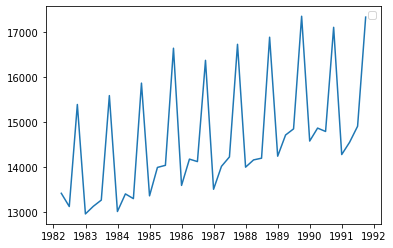

In [34]:
### Load required libraries

from    pandas                   import   read_csv, Grouper, DataFrame, concat
import  matplotlib.pyplot        as       plt
from    statsmodels.tsa.seasonal import   seasonal_decompose
from    datetime                 import   datetime
import  statsmodels.api          as       sm

Turnover              = pd.read_csv('data/RetailTurnover.csv')
date_rng              = pd.date_range(start='1/7/1982', end='31/3/1992', freq='Q')
Turnover['TimeIndex'] = pd.DataFrame(date_rng, columns=['Quarter'])
Turnover.head()

plt.plot(Turnover.TimeIndex, Turnover.Turnover)
plt.legend(loc='best')
plt.show()

<ipython-input-35-2cc03868ecf2>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decompTurnover = sm.tsa.seasonal_decompose(Turnover.Turnover, model="additive", freq=4)


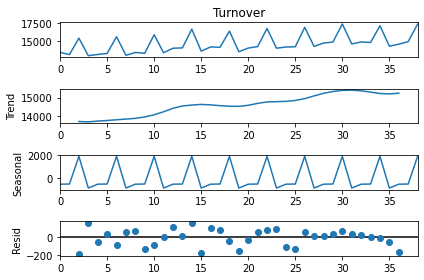

In [35]:
decompTurnover = sm.tsa.seasonal_decompose(Turnover.Turnover, model="additive", freq=4)
decompTurnover.plot()
plt.show()

Running the above code performs the decomposition, and plots the 4 resulting series.
We observe that the trend and seasonality are clearly separated.

In [36]:
trend = decompTurnover.trend
seasonal = decompTurnover.seasonal
residual = decompTurnover.resid

In [37]:
print(trend.head(12))
print(seasonal.head(12))
print(residual.head(12))

0            NaN
1            NaN
2     13692.5375
3     13674.1875
4     13716.7375
5     13748.1500
6     13789.3500
7     13827.8875
8     13866.6500
9     13944.9125
10    14062.1375
11    14228.4125
Name: trend, dtype: float64
0     -524.613498
1     -510.713672
2     1894.960113
3     -859.632943
4     -524.613498
5     -510.713672
6     1894.960113
7     -859.632943
8     -524.613498
9     -510.713672
10    1894.960113
11    -859.632943
Name: seasonal, dtype: float64
0            NaN
1            NaN
2    -188.697613
3     149.645443
4     -58.624002
5      34.263672
6     -88.010113
7      49.745443
8      67.263498
9    -129.998828
10    -83.197613
11     -2.279557
Name: resid, dtype: float64


### Practice Exercise 4

Using Champagne Series data, perform additive model decomposition. Refer to Practice Exercise 3.

Hint:
date_rng = pd.date_range(start='1/1/1964', end='30/9/1972', freq='M')
date_rng
Champ['TimeIndex'] = pd.DataFrame(date_rng, columns=['Month'])

### Example 7

### Decomposition of TS: Multiplicative model	

### Multiplicative Decomposition

* An additive model suggests that the components are multipled together.
* An additive model is non-linear such as quadratic or exponential. 
* Changes increase or decrease over time.
* A non-linear seasonality has an increasing or decreasing frequency (width of the cycles) and / or amplitude (height of the cycles) over time.

Perform multiplicative model decomposition on International Air Passengers Data.

In [38]:
### Load required libraries

from    pandas                   import   read_csv, Grouper, DataFrame, concat
import  matplotlib.pyplot        as       plt
from    statsmodels.tsa.seasonal import   seasonal_decompose
from    datetime                 import   datetime
import  statsmodels.api          as       sm

No handles with labels found to put in legend.


   Year Month  Pax
0  1949   Jan  112
1  1949   Feb  118
2  1949   Mar  132
3  1949   Apr  129
4  1949   May  121
DatetimeIndex(['1949-01-31', '1949-02-28', '1949-03-31', '1949-04-30',
               '1949-05-31', '1949-06-30', '1949-07-31', '1949-08-31',
               '1949-09-30', '1949-10-31',
               ...
               '1960-03-31', '1960-04-30', '1960-05-31', '1960-06-30',
               '1960-07-31', '1960-08-31', '1960-09-30', '1960-10-31',
               '1960-11-30', '1960-12-31'],
              dtype='datetime64[ns]', length=144, freq='M')
   Year Month  Pax  TimeIndex
0  1949   Jan  112 1949-01-31
1  1949   Feb  118 1949-02-28
2  1949   Mar  132 1949-03-31
3  1949   Apr  129 1949-04-30
4  1949   May  121 1949-05-31


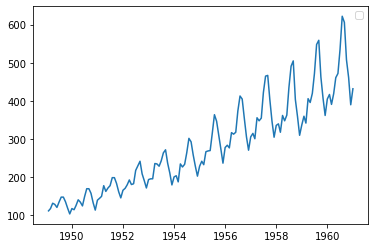

In [39]:
AirPax = pd.read_csv('data/AirPax.csv')
print(AirPax.head())

date_rng = pd.date_range(start='1/1/1949', end='31/12/1960', freq='M')
print(date_rng)

AirPax['TimeIndex'] = pd.DataFrame(date_rng, columns=['Month'])
print(AirPax.head())

plt.plot(AirPax.TimeIndex, AirPax.Pax)
plt.legend(loc='best')
plt.show()

<ipython-input-40-5155cb96efdd>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decompAirPax = sm.tsa.seasonal_decompose(AirPax.Pax, model="multiplicative", freq=12)


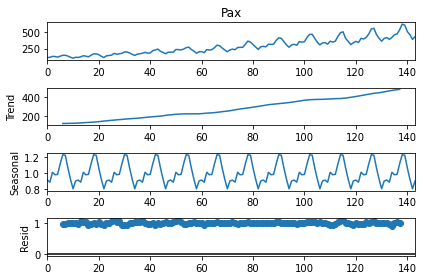

In [40]:
decompAirPax = sm.tsa.seasonal_decompose(AirPax.Pax, model="multiplicative", freq=12)
decompAirPax.plot()
plt.show()

Running the above code performs the decomposition, and plots the 4 resulting series.
We observe that the trend and seasonality are clearly separated.

In [41]:
seasonal = decompAirPax.seasonal
seasonal.head(4)

0    0.910230
1    0.883625
2    1.007366
3    0.975906
Name: seasonal, dtype: float64

### Practice Exercise 5

Perform multiplicative model decomposition on Tractor Sales Series

## Visualization of Seasonality - Month plots

Let us use retail turnover data and observe seasonality using visualization techniques.

In [42]:
### Load required libraries

from    pandas                   import   read_csv, Grouper, DataFrame, concat
import  matplotlib.pyplot        as       plt
from    statsmodels.tsa.seasonal import   seasonal_decompose
from    datetime                 import   datetime
import  statsmodels.api          as       sm

Turnover              = pd.read_csv('data/RetailTurnover.csv')
date_rng              = pd.date_range(start='1/7/1982', end='31/3/1992', freq='Q')
Turnover['TimeIndex'] = pd.DataFrame(date_rng, columns=['Quarter'])
Turnover.head()

quarterly_turnover = pd.pivot_table(Turnover, values = "Turnover", columns = "Quarter", index = "Year")
quarterly_turnover

Quarter,Q1,Q2,Q3,Q4
Year,,,,
1982,NaN,NaN,13423.2,13128.8
1983,15398.8,12964.2,13133.5,13271.7
1984,15596.3,13018.0,13409.3,13304.2
1985,15873.9,13366.5,13998.6,14045.1
1986,16650.3,13598.4,14183.2,14128.5
1987,16380.7,13512.8,14022.1,14231.8
1988,16737.0,14004.5,14165.5,14203.9
1989,16895.1,14248.2,14719.5,14855.8
1990,17361.6,14585.2,14873.5,14798.4


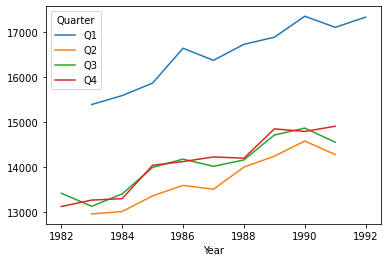

In [43]:
quarterly_turnover.plot()
plt.show()

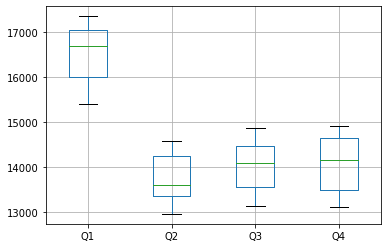

In [44]:
quarterly_turnover.boxplot()
plt.show()

### Observation

We see very clearly that the turnover is high in Quarter 1 and very low in quarter 2.

### Practice Exercise 6

Let us use Petrol data and observe seasonality using visualization techniques.

No handles with labels found to put in legend.


   Year Quarter  Consumption  TimeIndex
0  2001      Q1       14.978 2001-03-31
1  2001      Q2       11.099 2001-06-30
2  2001      Q3       10.057 2001-09-30
3  2001      Q4       10.454 2001-12-31
4  2002      Q1        9.295 2002-03-31


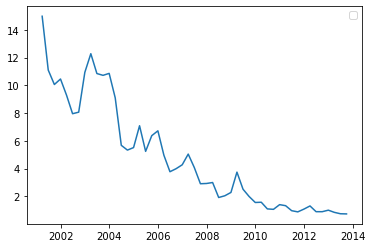

In [45]:
Petrol = pd.read_csv('data/Petrol.csv')
Petrol.head()
date_rng = pd.date_range(start='1/1/2001', end='30/9/2013', freq='Q')

#date_rng
Petrol['TimeIndex'] = pd.DataFrame(date_rng, columns=['Quarter'])
print(Petrol.head())

plt.plot(Petrol.TimeIndex, Petrol.Consumption)
plt.legend(loc='best')
plt.show()

### Seasonal Indices

* Seasonality is the presence of variations that occur at specific regular intervals less than a year, such as weekly, monthly, or quarterly. 
* Seasonality may be caused by various factors, such as weather, vacation, and holidays and consists of periodic, repetitive, and generally regular and predictable patterns in the levels of a time series.


## Moving average forecast

Moving Average Smoothing is a naive and effective technique in time series forecasting.

Smoothing is a technique applied to time series to remove the fine-grained variation between time steps. 

Calculating a moving average involves creating a new series where the values are comprised of the average of raw observations in the original time series.

A moving average requires that you specify a window size called the window width. This defines the number of raw observations used to calculate the moving average value. 

### Two main types of moving averages:
#### 1) Centered moving average  - calculated as the average of raw observations at, before and after time, t.
#### 2) Trailing moving average - uses historical observations and is used on time series forecasting.






The rolling() function on the Series Pandas object will automatically group observations into a window.

You can specify the window size, and by default, a trailing window is created. Once the window is created, we can use the mean value, which forms our transformed dataset.


### Example 8
###  Average and moving average for Air Temp data

In [46]:
### Load required libraries

from    pandas                   import   read_csv, Grouper, DataFrame, concat
import  matplotlib.pyplot        as       plt
from    datetime                 import   datetime


In [47]:
AirTemp              =  pd.read_csv('data/AirTemp.csv')
date_rng             =  pd.date_range(start='1/1/1920', end='31/12/1939', freq='M')
AirTemp['TimeIndex'] = pd.DataFrame(date_rng, columns=['Month'])
AirTemp.head()

,Year,Month,AvgTemp,TimeIndex
0,1920,Jan,40.6,1920-01-31
1,1920,Feb,40.8,1920-02-29
2,1920,Mar,44.4,1920-03-31
3,1920,Apr,46.7,1920-04-30
4,1920,May,54.1,1920-05-31


#### Plot the average temp

No handles with labels found to put in legend.


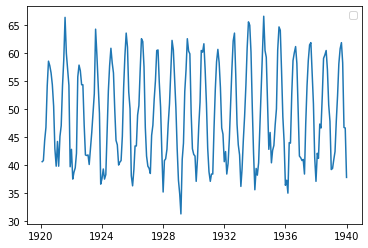

In [48]:
plt.plot(AirTemp.TimeIndex, AirTemp.AvgTemp)
plt.legend(loc='best')
plt.show()

#### Plot the average forecast

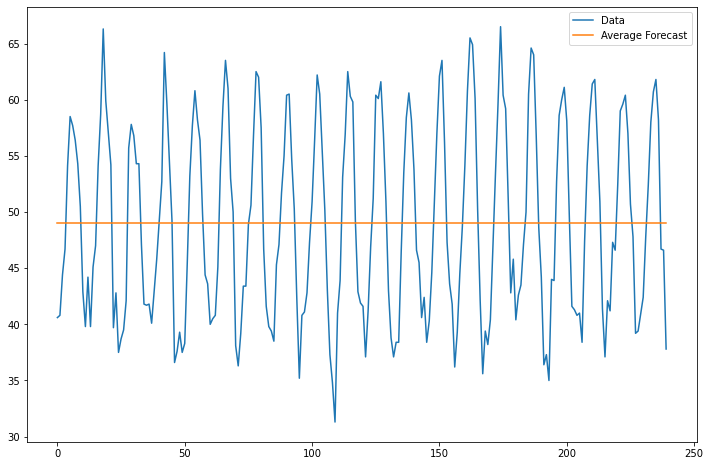

In [49]:
temp_avg                 = AirTemp.copy()
temp_avg['avg_forecast'] = AirTemp['AvgTemp'].mean()

plt.figure(figsize=(12,8))
plt.plot(AirTemp['AvgTemp'], label='Data')
plt.plot(temp_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

#### Plot the moving average forecast and average temperature

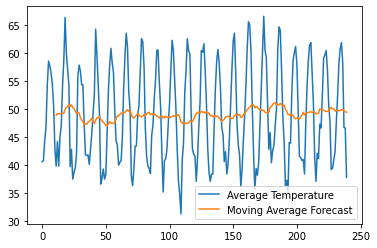

In [50]:
mvg_avg = AirTemp.copy()
mvg_avg['moving_avg_forecast'] = AirTemp['AvgTemp'].rolling(12).mean()
plt.plot(AirTemp['AvgTemp'], label='Average Temperature')
plt.plot(mvg_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

### Example 9
### Moving average of window size 5 for US GDP

In [51]:
### Load required libraries

from    pandas                   import   read_csv, Grouper, DataFrame, concat
import  matplotlib.pyplot        as       plt
from    datetime                 import   datetime


No handles with labels found to put in legend.


DatetimeIndex(['1929-12-31', '1930-12-31', '1931-12-31', '1932-12-31',
               '1933-12-31', '1934-12-31', '1935-12-31', '1936-12-31',
               '1937-12-31', '1938-12-31', '1939-12-31', '1940-12-31',
               '1941-12-31', '1942-12-31', '1943-12-31', '1944-12-31',
               '1945-12-31', '1946-12-31', '1947-12-31', '1948-12-31',
               '1949-12-31', '1950-12-31', '1951-12-31', '1952-12-31',
               '1953-12-31', '1954-12-31', '1955-12-31', '1956-12-31',
               '1957-12-31', '1958-12-31', '1959-12-31', '1960-12-31',
               '1961-12-31', '1962-12-31', '1963-12-31', '1964-12-31',
               '1965-12-31', '1966-12-31', '1967-12-31', '1968-12-31',
               '1969-12-31', '1970-12-31', '1971-12-31', '1972-12-31',
               '1973-12-31', '1974-12-31', '1975-12-31', '1976-12-31',
               '1977-12-31', '1978-12-31', '1979-12-31', '1980-12-31',
               '1981-12-31', '1982-12-31', '1983-12-31', '1984-12-31',
      

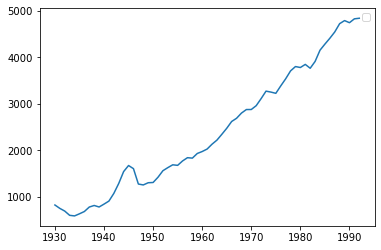

In [52]:
USGDP    = pd.read_csv('data/GDPUS.csv', header=0)
date_rng = pd.date_range(start='1/1/1929', end='31/12/1991', freq='A')
print(date_rng)

USGDP['TimeIndex'] = pd.DataFrame(date_rng, columns=['Year'])
plt.plot(USGDP.TimeIndex, USGDP.GDP)

plt.legend(loc='best')
plt.show()

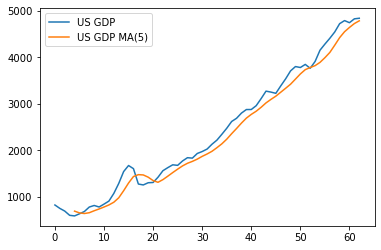

In [53]:
mvg_avg_USGDP = USGDP.copy()
mvg_avg_USGDP['moving_avg_forecast'] = USGDP['GDP'].rolling(5).mean()
plt.plot(USGDP['GDP'], label='US GDP')
plt.plot(mvg_avg_USGDP['moving_avg_forecast'], label='US GDP MA(5)')
plt.legend(loc='best')
plt.show()

Moving average line is close to the original data line.

### Example 10
### Moving average of window size 3 for India GDP

In [54]:
### Load required libraries

from    pandas                   import   read_csv, Grouper, DataFrame, concat
import  matplotlib.pyplot        as       plt
from    datetime                 import   datetime

No handles with labels found to put in legend.


   Year  GDPpercapita  TimeIndex
0  1960     81.284764 1960-12-31
1  1961     84.426437 1961-12-31
2  1962     88.914919 1962-12-31
3  1963    100.048592 1963-12-31
4  1964    114.315161 1964-12-31


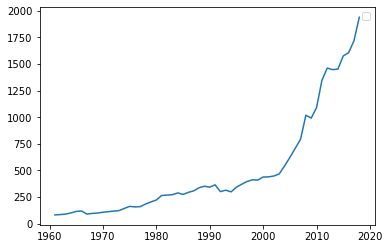

In [55]:
IndiaGDP              = pd.read_csv('data/GDPIndia.csv', header=0)

date_rng              = pd.date_range(start='1/1/1960', end='31/12/2017', freq='A')
IndiaGDP['TimeIndex'] = pd.DataFrame(date_rng, columns=['Year'])

print(IndiaGDP.head())

plt.plot(IndiaGDP.TimeIndex, IndiaGDP.GDPpercapita)
plt.legend(loc='best')
plt.show()

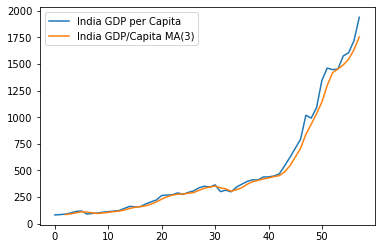

In [56]:
mvg_avg_IndiaGDP                        = IndiaGDP.copy()
mvg_avg_IndiaGDP['moving_avg_forecast'] = IndiaGDP['GDPpercapita'].rolling(3).mean()

plt.plot(IndiaGDP['GDPpercapita'], label='India GDP per Capita')
plt.plot(mvg_avg_IndiaGDP['moving_avg_forecast'], label='India GDP/Capita MA(3)')
plt.legend(loc='best')
plt.show()

Moving average line is close to the original data line.

### Practice Exercise 7

Use Daily Wage data and calculate Moving Average of width 7 and 3.

In [57]:
### Load required libraries

from    pandas                   import   read_csv, Grouper, DataFrame, concat
import  matplotlib.pyplot        as       plt
from    datetime                 import   datetime

In [58]:
EngWage              = pd.read_csv('data/EngWage.csv', header=0)
EngWage.head()

,Year,DailyWage
0,1950,24.27
1,1951,24.17
2,1952,23.76
3,1953,24.17
4,1954,25.18


### Missing Data

#### 1. 	No missing data is allowed in time series as data is ordered.
#### 2. 	It is simply not possible to shift the series to fill in the gaps.


### Reasons for missing data

#### 1) 	Data is not collected or recorded
#### 2) 	Data never existed
#### 3) 	Data corruption

#### Mark missing values

* NaN is the default missing value marker for reasons of computational speed and convenience. 
* We can easily detect this value with data of different types: floating point, integer, Boolean and general object. 
* However, the Python None will arise and we wish to also consider that missing.
* To make detecting missing values easier across different array dtypes, pandas provides functions, isna() and notna(), which are also methods on Series and DataFrame objects.
* For datetime64[ns] types, NaT represents missing values. Pandas objects provide histocompatibility between NaT and NaN.

### Inserting missing values

You can assign missing values by simply assigning to containers. The missing value will be chosen based on the dtype.

In [59]:
import pandas as pd
import numpy  as np
s = pd.Series([1,2,3,4,5,6])
s.loc[4] = np.NaN
print(s)

0    1.0
1    2.0
2    3.0
3    4.0
4    NaN
5    6.0
dtype: float64


### Calculations with missing values

**Descriptive statistics and computational statistical methods are written to take into account for missing data.  **

**Examples:**

* When summing data, NA(missing) values will be treated as zeros.
* If the data are all NA, the result will be 0.
* Cumulative methods like cumsum() and cumprod() ignore NA values by default but preserve them in the resulting arrays. To override this behaviour and include NA values, use skipna = False

A time series is a series of data points indexed in time order.  Most of the times, users want to replace the missing values in time series data by neighbouring non-missing values.  There may be a need for imputation or interpolation of missing values lying in between known values. 

Methods of imputation for replacing missing values (meaningful values)

| Method | When suitable |
| ---------------------------- | ------------------------------------ |
| Take average of the nearest neighbours | Data has no seasonality |
| Take average of the seasons from two or all available years | Data has seasonality |
| Interpolate function of pandas |  |
| Linear interpolation | Relationship in the interval of two samples is a first order polynomial |
| Polynomial such as Quadratic or Cubic interpolation | Second or third order polynomial describes the interval between two samples |
| Spline | Handles non-uniform spacing of samples |

### Example 11

The file "Shoe Sales.csv", contains the shoe sales data about  number of pairs sold during the period 2011 - 2015. In May 2012, the number of pairs sold was 932. Let us replace this with missing value and try to interpolate.

In [60]:
from     pandas                   import read_csv
from     pandas                   import datetime
import matplotlib.pyplot as         plt
import numpy                    as         np

def parser(x): return datetime.strptime(x, '%Y-%b')

series              =  read_csv('data/Shoe Sales.csv', header = 0, index_col = 0, parse_dates = True,
                                              squeeze = True, date_parser = parser)
df                    = pd.DataFrame(series)

df.plot()
plt.show()

<ipython-input-60-da256279e049>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from     pandas                   import datetime


FileNotFoundError: [Errno 2] No such file or directory: 'data/Shoe Sales.csv'

Let us replace the number of pairs for 2012-May which is 932 as np.NaN.
Interpolate using linear of polynomial or spline methods.

Since the data has monthly frequency, we can resample at a shorter frequency such as day, Daily to get a better predicton.
Some of the alias for time series frequency to be used in resample():
1. B: Business Day frequency
2. D: Calendar Day frequency
3. M: Month End frequency
4. MS: Month Start frequency
5. Q: Quarter End Frequency
6. QS: Quarter Start Frequency
7. H: Hourly Frequency
8. A: Year End frequency

http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases


In [ ]:
df.replace(932, np.NaN, inplace = True)
series.converted  = df['No. of Pairs']
ts                             = series.converted.resample('D', how = 'mean');

series_imputed1   = ts.interpolate(method = 'linear')
series_imputed1.plot()
plt.title('After interpolation')
plt.show()


In [ ]:
print('Imputed value')
print(series_imputed1['2012-05'].head(12))

print('Original value')
print(series['2012-05'].head(12))


## Forecast Range, Accuracy and Various Requirements

Time Series forecast models can both make predictions and provide a confidence interval for those predictions. 

### Forecast Range


**Confidence intervals provide an upper and lower expectation for the real observation. **

These are useful for assessing the range of real possible outcomes for a prediction and for better understanding the skill of the model.

For example, the ARIMA implementation in the statsmodel python library can be used to fit an ARIMA model. It returns an ARIMAResults object. 

The object provides the forecast() function returns three values:
* 1) Forecast: The forecasted value in the 
* 2) Standard Error of the model: 
* 3) Confidence Interval: The 95% confidence interval for the forecast


### Forecast Accuracy


The error in the forecast is the difference between the actual value and the forecast.

Two popular accuracy measures are RMSE and MAPE.

### Forecast  Requirements

A time series model must contain a key time column that contains unique values, input columns, and at least one predictable column.


Time series data often requires cleaning, scaling, and even transformation

**Frequency:** Data may be provided at a frequency that is too high to model or is unvenly spread through time requiring  resampling for use in models.

**Outliers:** Data may contain corrupt or extreme outlier values that need to be identified and handled.

**Frequency:**

* Frequencies may be too granular or not granular enough to get insights.
* The pandas library in Pyhton provides the capability to increase or decrease the sampling frequency of the time series data.

**Resampling:**

* Resampling may be required if the data is not available at the same frequency that you want to make predictions.
* Resampling may be required to provide additional structure or insight into the learning problem for supervised learning models.

**Up-sampling**
* Increase the frequencies of the sample, example: months to days
* Care may be needed in deciding how the fine-grained observations are calculated using interpolation.

* The function, resample() available in the pandas library works on the Series and DataFrame objects.
* This can be used to group records when down-sampling and make space for new observations when up-sampling.

### Example 12

**Up-sampling frequency**

* The observations in the Shampoo Sales are monthly. We need to up-sample the frequency from monthly to daily and use an interpolation scheme to fill in the new daily frequency.

* We can use this function to transform our monthly dataset into a daily dataset by calling resampling and specifying preferred frequency of calendar day frequency or D.

In [ ]:
#upsample to daily sales
from   pandas            import read_csv
from   pandas            import datetime
import matplotlib.pyplot as     plt

def parser(x):
       return datetime.strptime('190'+x, '%Y-%m')

tseries = read_csv('data/shampoo-sales.csv', header = 0, index_col = 0, parse_dates = True, 
                               squeeze = True, date_parser = parser)

upsampled_ts = tseries.resample('D').mean()
print(upsampled_ts .head(36))

### Inference

We observe that the resample() function has created the rows by putting NaN values as new values for dates other than day 01. 

Next we can interpolate the missing  values at this new frequency. The function, interpolate() of pandas library is used to interpolate the missing values. 
We use a linear interpolation which draws a straight line between available data, on the first day of the month and fills in values at the chosen frequency from this line. 


In [ ]:
interpolated = upsampled_ts.interpolate(method = 'linear')
interpolated.plot()
plt.show()

**Another common interpolation**

* Another common interpolation method is to use a polynomial or a spline to connect the values.
This creates more curves and look more natural on many datasets.
* Using a spline interpolation requires you specify the order (count of terms in the polynomial); we use 2.

In [ ]:
interpolated1 = upsampled_ts.interpolate(method = 'spline', order = 2)
interpolated1.plot()
plt.show()

In [ ]:
print(interpolated1.head(12))

### Example 13

**Down-sampling Frequency**

* The sales data is monthly, but we prefer the data to be quarterly. The year can be divided into 4 business quarters, 3 months a piece. 
* The resample() function will group all observations by the new frequency.
* We need to decide how to create a new quarterly value from each group of 3 records. We shall use the mean() function to calculate the average monthly sales numbers for the quarter

In [ ]:
resample             = tseries.resample('Q')
quarterly_mean_sales = resample.mean()
print(quarterly_mean_sales.head())
quarterly_mean_sales.plot()
plt.show()

### Example 14

We can turn monthly data into yearly data. Down-sample the data using the alias, A for year-end frequency and this time use sum to calculate the total sales each year.

In [ ]:
resample = tseries.resample('A')
yearly_mean_sales = resample.sum()
print(yearly_mean_sales.head() )
yearly_mean_sales.plot()
plt.show()

**Outliers**
Data may contain corrupt or extreme outlier values that need to be identified and handled.

####  Detection of outliers in time series is difficult.
* If a trend is present in the data, then usual method of detecting outliers by boxplot may not work.
* If seasonality is present in the data, one particular season's data may be too small or too large compared to others.

#### Decomposition helps in identifying unsual observations

* If trend and seasonality are not adequate to explain the observation

#### Outliers cannot be eliminated - they need to be imputed as closely as possible by using the knowledge gained from decomposition.

### Types of Trends

* Deterministic Trends: They consistently increase or decrease and are easier to identify.
* Stochastic Trends: They increase and decrease inconsistently 

#### Detrend a time series is by differencing

### Example 15

####  Detrend a time series data (Shampoo sales) using differencing



In [ ]:
from    pandas             import   read_csv 
from    pandas             import   datetime 
import  matplotlib.pyplot  as       plt
def parser(x): 
    return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('data/shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser) 
X      = series.values 
diff = list() 
for i in range(1, len(X)): 
     value = X[i] - X[i - 1] 
     diff.append(value) 
plt.plot(diff) 
plt.show()

#### Inference

We don't see any particular trend in the data.

An identified trend can be modeled. Once modeled, it can be removed from the time series dataset. 

#### Detrend by model fitting

### Example 16

We will use Shampoo dataset.

* A linear model can be fit on the time index to predict the observation. 
* Get a trend line from the predictions from this model.
* Subtract these predictions from the original time series to provide a detrended version of the dataset.

We will use a scikit-learn LinearRegression model to train the data.

In [ ]:
from     sklearn.linear_model import LinearRegression 
import   numpy  as np

# fit linear model 
X = [i for i in range(0, len(series))] 
X = np.reshape(X, (len(X), 1))
y = series.values 
model = LinearRegression() 
model.fit(X, y) 

# calculate trend 
trend = model.predict(X) 

# plot trend 
plt.plot(y) 
plt.plot(trend) 
plt.show() 

# detrend 
detrended = [y[i]-trend[i] for i in range(0, len(series))] 

# plot detrended 
plt.plot(detrended) 
plt.show()

#### Inference

We have plotted the trend line in orange colour over the original dataset in blue colour.

## Seasonal variation may be present in Time series data.

* Seasonal variation, or seasonality, are cycles that repeat regularly over time.

* By plotting and reviewing the data, you can determine if there is any seasonality in the data.
* We can try with different scales and by adding a trend line.
* Once the seasonality is identified, it can be modeled. When you remove the model of seasonality from the time series, it is called deseasonalizing or seasonal adjustment.

** Seasonal adjustment with differencing**

We can test the seasonality differencing method on the daily minimum temperature data.

In [ ]:
# deseasonalize monthly data by differencing 

import  pandas             as pd
import  matplotlib.pyplot  as plt

series         = pd.read_csv('data/daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
resample       = series.resample('M') 
monthly_mean   = resample.mean() 

X              = series.values 
diff           = list() 
months_in_year = 12 

for i in range(months_in_year, len(monthly_mean)): 
    value = monthly_mean[i] - monthly_mean[i - months_in_year] 
    diff.append(value) 

plt.plot(diff) 
plt.show()

### Practice Exercise 8

Refer to example 6.Use Tractor sales data detrend using both differencing and model fitting. 

### Accuracy measures

We would have used several models such as moving average, exponential smoothing, etc. before selecting the best model. 

The model selection may depend on the chosen forecasting accuracy measure such as: 

* Mean Absolute Error,  MAE = (1/n) (|Y1 - F1| + |Y2- F2| + ... + |Yn - Fn|)
* Mean Absolute Percentage Error,  MAPE = (1/n) ((|Y1 - F1|/Y1) + (|Y2 - F2|/Y2) + ... + (|Yn- Fn|/Yn) * 100)
* Mean Squared Error, MSE =  (1/n) ((Y1 - F1)^2 + (Y2- F2)^2 + ... + (Yn - Fn)^2)
* Root Mean Square Error, RMSE = square root of MSE

where n is the number of observations
Yn is the actual value of Y at time n
Fn is the corresponding forecasted value.
RMSE and MAPE are two most popular accuracy measures of forecasting.

### Example 17

Let us take the Daily Female Births Dataset as an example. 

This dataset describes the number of daily female births in California in 1959.

Fit a moving average of window width 3 and evalue the model measures such as RMSE and MAPE.

In [ ]:
from   pandas               import  read_csv, datetime
import pandas               as      pd
import matplotlib.pyplot    as      plt
from   sklearn.metrics      import  mean_squared_error
import numpy                as      np

#### Define functions to calculate MAE  and MAPE 

In [ ]:
def MAE(y,yhat):
    diff = np.abs(np.array(y)-np.array(yhat))
    try:
        mae =  round(np.mean(np.fabs(diff)),3)
    except:
        print("Error while calculating")
        mae = np.nan
    return mae

In [ ]:
def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.mean(np.abs((y - yhat) / y)) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [ ]:
series       =  read_csv('data/daily-total-female-births.csv', 
                         header=0, index_col=0, parse_dates=True, squeeze=True) 

# tail rolling average transform
rolling      =  series.rolling(window = 3) # arbitrarily chosen

rolling_mean =  rolling.mean()
series.plot()

rolling_mean.plot(color = 'red')
plt.show()

# Zoomed plot original and transformed dataset
series[:100].plot()
rolling_mean[:100].plot(color = 'red')
plt.show()

In [ ]:
y_df = pd.DataFrame( {'Observed':series.values, 'Predicted':rolling_mean})
y_df .dropna(axis = 0, inplace = True)
print(y_df.tail())

rmse = np.sqrt(mean_squared_error(y_df.Observed, y_df.Predicted))
print("\n\n Accuracy measures ")
print('RMSE: %.3f' % rmse)
n = y_df.shape[0]

mae = MAE(y_df.Observed, y_df.Predicted)
print('MAE: %d' % np.float(mae))

mape = MAPE(y_df.Observed, y_df.Predicted)
print('MAPE: %.3f' % np.float(mape))

### Practice Exercise 9

In the above example try window width 2 and 4 and check the accuracy has increased or decreased in both cases.

### Take home Exercise

### Exercise 1

Use Champagne Sales data and observe seasonality using visualization techniques. Refer to practice exercise 3.

### Exercise 2

Fit a moving average model for Champagne Sales data after decomposing with various window widths and compare the performance measures such as RMSE and MAPE.